In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing as pr
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve, plot_roc_curve, auc
from sklearn import model_selection as ms
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import statsmodels.api as st
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Preprocessing

In [4]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
data.fillna(data['bmi'].mean(), inplace=True)

In [6]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
#id is unique value so id field is dropped from data
data.drop(['id'], axis=1, inplace=True)

In [8]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [10]:
#Discretization
labels=['Young','Adult','Middle-aged Adult','Old Adult']
data['age']=pd.qcut(data['age'], q=4, labels=labels)

In [11]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,Old Adult,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,Middle-aged Adult,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,Old Adult,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,Middle-aged Adult,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,Old Adult,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


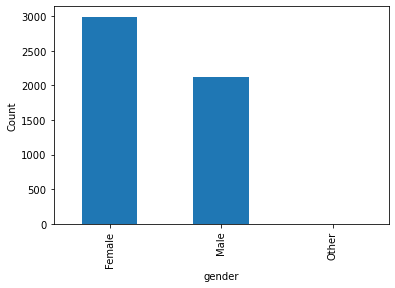

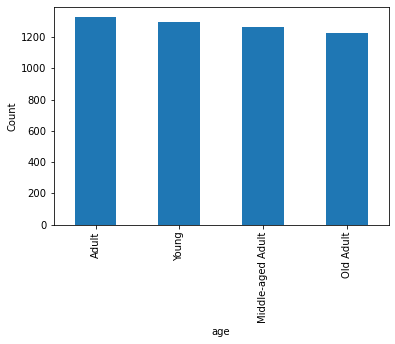

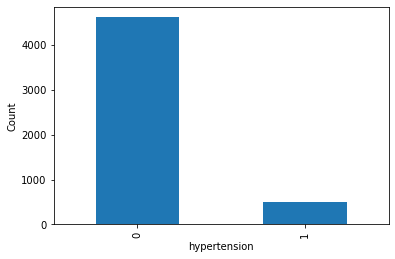

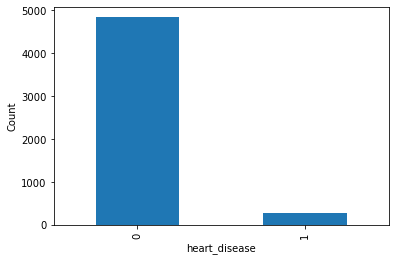

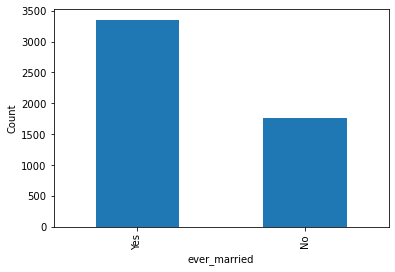

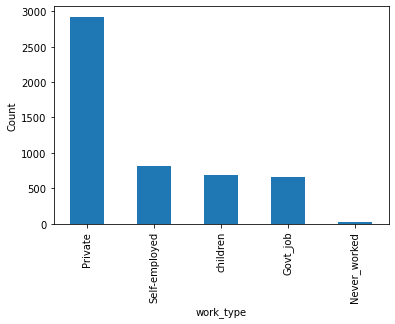

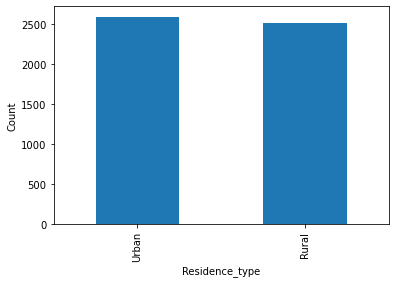

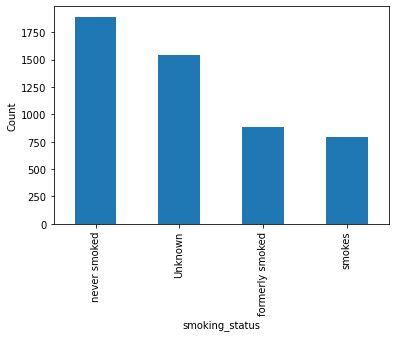

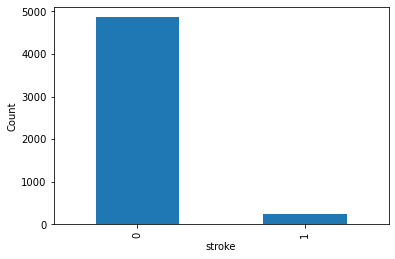

In [12]:
#Dataset is imbalanced
labels=['gender','age', 'hypertension', 'heart_disease','ever_married', 'work_type', 'Residence_type', 'smoking_status','stroke']
for i in labels:
    data[i].value_counts().plot(kind="bar")
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.show()

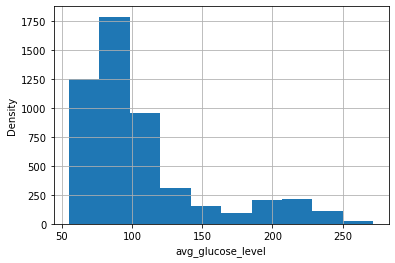

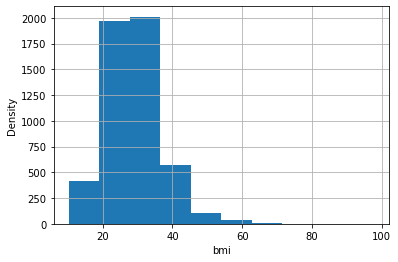

In [13]:
labels=['avg_glucose_level', 'bmi']
for i in labels:
    data[i].hist()
    plt.xlabel(i)
    plt.ylabel('Density')
    plt.show()

In [14]:
index=['gender','age', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for i in index:
    print(data[i].value_counts())

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
Adult                1325
Young                1293
Middle-aged Adult    1264
Old Adult            1228
Name: age, dtype: int64
Yes    3353
No     1757
Name: ever_married, dtype: int64
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [15]:
data[data['gender']=='Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,Adult,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [16]:
data.drop([3116], axis=0, inplace=True)

In [17]:
data['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [18]:
#Label Encoder and One Hot Encoder
label_encoder=LabelEncoder()
index=['gender', 'ever_married', 'Residence_type']
for i in index:
    data[i]=label_encoder.fit_transform(data[i])

In [19]:
data= pd.get_dummies(data ,prefix = 'age' ,columns = ['age'],drop_first = True)
data= pd.get_dummies(data ,prefix = 'work_type' ,columns = ['work_type'],drop_first = True)
data= pd.get_dummies(data ,prefix = 'smoking_status' ,columns = ['smoking_status'],drop_first = True)

In [20]:
data.head()

,gender,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,age_Adult,age_Middle-aged Adult,age_Old Adult,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0,1,1,1,228.69,36.600000,1,0,0,1,0,1,0,0,1,0,0
1,0,0,0,1,0,202.21,28.893237,1,0,1,0,0,0,1,0,0,1,0
2,1,0,1,1,0,105.92,32.500000,1,0,0,1,0,1,0,0,0,1,0
3,0,0,0,1,1,171.23,34.400000,1,0,1,0,0,1,0,0,0,0,1
4,0,1,0,1,0,174.12,24.000000,1,0,0,1,0,0,1,0,0,1,0


In [21]:
df=data.copy()

<AxesSubplot:>

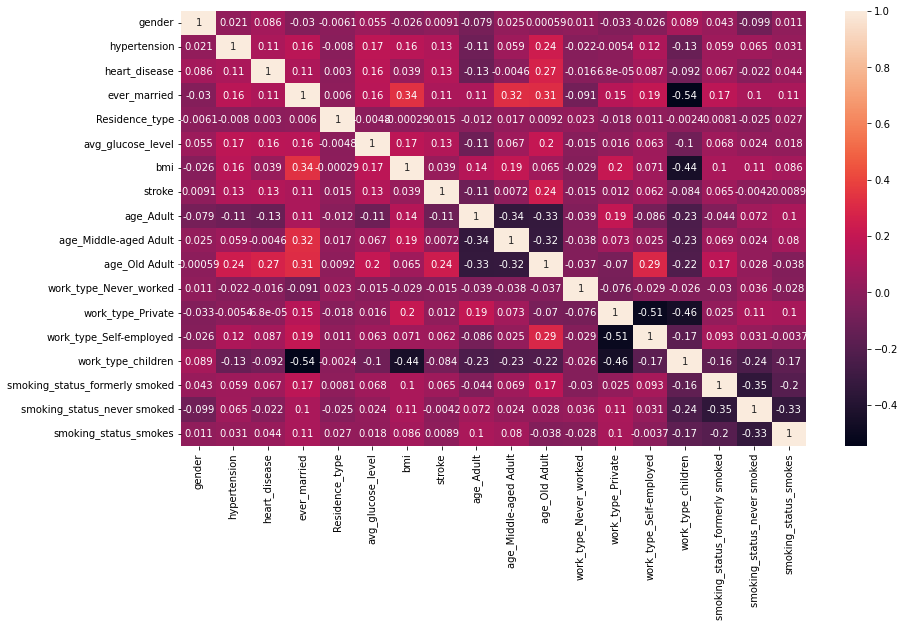

In [22]:
#Correlation Heat Map
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(), annot=True)

In [23]:
# When the correlation between the two fields exceeds 0.50, one is dropped from the data set.
data.drop(['work_type_children'], axis=1, inplace=True)
data.drop(['work_type_Self-employed'], axis=1, inplace=True)

In [24]:
X=data.drop(data[['stroke']], axis=1)
Y=data['stroke']

In [25]:
# Standard scaler
sc = pr.StandardScaler()
X=sc.fit_transform(X)

CLASSIFICATION

In [26]:
x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [27]:
!pip install Tensorflow
!pip install imbalanced-learn


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
from imblearn.over_sampling import SMOTE

In [29]:
print("Before OverSampling, counts of label '1':",sum(y_train==1))
print("Before OverSampling, counts of label '0':",sum(y_train==0))

Before OverSampling, counts of label '1': 184
Before OverSampling, counts of label '0': 3647


In [30]:
sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

In [31]:
print("After OverSampling, counts of label '1':",sum(y_train_res==1))
print("After OverSampling, counts of label '0':",sum(y_train_res==0))

After OverSampling, counts of label '1': 3647
After OverSampling, counts of label '0': 3647


Logistic Regression

In [32]:
logr=LogisticRegression(random_state=0)
logr.fit(x_train_res,y_train_res)
y_pred_logr=logr.predict(x_test)

In [33]:
cm_logr=confusion_matrix(y_test,y_pred_logr)
print(cm_logr)

[[866 347]
 [ 18  47]]


In [34]:
print('Classification Report\n :', metrics.classification_report(y_test,y_pred_logr))

Classification Report
 :               precision    recall  f1-score   support

           0       0.98      0.71      0.83      1213
           1       0.12      0.72      0.20        65

    accuracy                           0.71      1278
   macro avg       0.55      0.72      0.52      1278
weighted avg       0.94      0.71      0.79      1278



In [35]:
vldt1=ms.cross_val_score(estimator=logr,X=x_train_res,y=y_train_res,cv=5)
print(vldt1)
print(vldt1.mean())

[0.76079507 0.77450308 0.79232351 0.7834133  0.77160494]
0.7765279787441084


KNeighbors

In [36]:
knn=KNeighborsClassifier()
knn.fit(x_train_res,y_train_res)
y_pred_knn=knn.predict(x_test)

In [37]:
cm_knn=confusion_matrix(y_test,y_pred_knn)
print(cm_knn)

[[1040  173]
 [  44   21]]


In [38]:
print('Classification Report\n :', metrics.classification_report(y_test,y_pred_knn))

Classification Report
 :               precision    recall  f1-score   support

           0       0.96      0.86      0.91      1213
           1       0.11      0.32      0.16        65

    accuracy                           0.83      1278
   macro avg       0.53      0.59      0.53      1278
weighted avg       0.92      0.83      0.87      1278



In [39]:
vldt2=ms.cross_val_score(estimator=knn,X=x_train_res,y=y_train_res,cv=5)
print(vldt2)
print(vldt2.mean())

[0.90267306 0.91021247 0.91226868 0.91226868 0.90877915]
0.909240408382388


GaussianNB

In [40]:
gnb=GaussianNB()
gnb.fit(x_train_res,y_train_res)
y_pred_gnb=gnb.predict(x_test)

In [41]:
cm_gnb=confusion_matrix(y_test,y_pred_gnb)
print(cm_gnb)

[[341 872]
 [  3  62]]


In [42]:
print('Classification Report\n :', metrics.classification_report(y_test,y_pred_gnb))

Classification Report
 :               precision    recall  f1-score   support

           0       0.99      0.28      0.44      1213
           1       0.07      0.95      0.12        65

    accuracy                           0.32      1278
   macro avg       0.53      0.62      0.28      1278
weighted avg       0.94      0.32      0.42      1278



In [43]:
vldt3=ms.cross_val_score(estimator=gnb,X=x_train_res,y=y_train_res,cv=5)
print(vldt3)
print(vldt3.mean())

[0.61411926 0.62851268 0.64838931 0.63468129 0.61591221]
0.6283229488976704


BernoulliNB

In [44]:
bnb=BernoulliNB()
bnb.fit(x_train_res,y_train_res)
y_pred_bnb=bnb.predict(x_test)

In [45]:
cm_bnb=confusion_matrix(y_test,y_pred_bnb)
print(cm_bnb)

[[919 294]
 [ 18  47]]


In [46]:
print('Classification Report\n :', metrics.classification_report(y_test,y_pred_bnb))

Classification Report
 :               precision    recall  f1-score   support

           0       0.98      0.76      0.85      1213
           1       0.14      0.72      0.23        65

    accuracy                           0.76      1278
   macro avg       0.56      0.74      0.54      1278
weighted avg       0.94      0.76      0.82      1278



In [47]:
vldt4=ms.cross_val_score(estimator=bnb,X=x_train_res,y=y_train_res,cv=5)
print(vldt4)
print(vldt4.mean())

[0.75325565 0.74914325 0.76627827 0.77244688 0.75308642]
0.7588420954653534


DecisionTree

In [48]:
dct=DecisionTreeClassifier(random_state=0)
dct.fit(x_train_res,y_train_res)
y_pred_dct=dct.predict(x_test)

In [49]:
cm_dct=confusion_matrix(y_test,y_pred_dct)
print(cm_dct)

[[1120   93]
 [  56    9]]


In [50]:
print('Classification Report\n :', metrics.classification_report(y_test,y_pred_dct))

Classification Report
 :               precision    recall  f1-score   support

           0       0.95      0.92      0.94      1213
           1       0.09      0.14      0.11        65

    accuracy                           0.88      1278
   macro avg       0.52      0.53      0.52      1278
weighted avg       0.91      0.88      0.90      1278



In [51]:
vldt5=ms.cross_val_score(estimator=dct,X=x_train_res,y=y_train_res,cv=5)
print(vldt5)
print(vldt5.mean())

[0.87799863 0.91843729 0.94242632 0.93968472 0.91632373]
0.9189741362208552


RandomForest

In [52]:
rf=RandomForestClassifier()
rf.fit(x_train_res,y_train_res)
y_pred_rf=rf.predict(x_test)

In [53]:
cm_rf=confusion_matrix(y_test,y_pred_rf)
print(cm_rf)

[[1164   49]
 [  59    6]]


In [54]:
print('Classification Report\n :', metrics.classification_report(y_test,y_pred_rf))

Classification Report
 :               precision    recall  f1-score   support

           0       0.95      0.96      0.96      1213
           1       0.11      0.09      0.10        65

    accuracy                           0.92      1278
   macro avg       0.53      0.53      0.53      1278
weighted avg       0.91      0.92      0.91      1278



In [55]:
vldt7=ms.cross_val_score(estimator=rf,X=x_train_res,y=y_train_res,cv=5)
print(vldt7)
print(vldt7.mean())

[0.91980809 0.96847156 0.96984236 0.96641535 0.96639232]
0.9581859345192931


SVC

In [56]:
svc=SVC()
svc.fit(x_train_res,y_train_res)
y_pred_svc=svc.predict(x_test)

In [57]:
cm_svc=confusion_matrix(y_test,y_pred_svc)
print(cm_svc)

[[991 222]
 [ 37  28]]


In [58]:
print('Classification Report\n :', metrics.classification_report(y_test,y_pred_svc))

Classification Report
 :               precision    recall  f1-score   support

           0       0.96      0.82      0.88      1213
           1       0.11      0.43      0.18        65

    accuracy                           0.80      1278
   macro avg       0.54      0.62      0.53      1278
weighted avg       0.92      0.80      0.85      1278



In [59]:
vldt8=ms.cross_val_score(estimator=svc,X=x_train_res,y=y_train_res,cv=5)
print(vldt8)
print(vldt8.mean())

[0.8594928  0.89307745 0.89787526 0.88416724 0.87379973]
0.8816824948218851


Grid Search

Logistic Regression

In [60]:
p=[{'C':[1,2,3,4,5],'random_state':[0]}]

In [61]:
gs=ms.GridSearchCV(estimator=logr, param_grid=p, scoring='accuracy', cv=5)
gs_search=gs.fit(x_train_res,y_train_res)

In [62]:
print("Best Parameter: ",gs_search.best_params_)
print("Best Score: ",gs_search.best_score_)

Best Parameter:  {'C': 3, 'random_state': 0}
Best Score:  0.7769390312811733


KNeighbors

In [63]:
p=[{'n_neighbors':range(1,11), 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]

In [64]:
gs=ms.GridSearchCV(estimator=knn, param_grid=p, scoring='accuracy', cv=5)
gs_search=gs.fit(x_train_res,y_train_res)

In [65]:
print("Best Parameter: ",gs_search.best_params_)
print("Best Score: ",gs_search.best_score_)

Best Parameter:  {'metric': 'manhattan', 'n_neighbors': 1}
Best Score:  0.9551689480458553


Decision Tree

In [66]:
p=[{'criterion':['gini','entropy'],'random_state':[0]}]

In [67]:
gs=ms.GridSearchCV(estimator=dct, param_grid=p, scoring='accuracy', cv=5)
gs_search=gs.fit(x_train_res,y_train_res)

In [68]:
print("Best Parameter: ",gs_search.best_params_)
print("Best Score: ",gs_search.best_score_)

Best Parameter:  {'criterion': 'entropy', 'random_state': 0}
Best Score:  0.9280228391771053


Random Forest

In [83]:
p=[{'n_estimators':range(1,50), 'criterion':['entropy','gini']}]

In [84]:
gs=ms.GridSearchCV(estimator=rf, param_grid=p, scoring='accuracy', cv=5)
gs_search=gs.fit(x_train_res,y_train_res)

In [85]:
print("Best Parameter: ",gs_search.best_params_)
print("Best Score: ",gs_search.best_score_)

Best Parameter:  {'criterion': 'entropy', 'n_estimators': 42}
Best Score:  0.9603795936672336


SVC

In [72]:
p=[{'C':[1,2,3,4,5], 'kernel':['linear']},{'C':[1,2,3,4,5], 'kernel':['rbf'],'gamma':[1,0.5,0.1,0.01,0.001]}]

In [73]:
gs=ms.GridSearchCV(estimator=svc, param_grid=p, scoring='accuracy',cv=5)
gs_search=gs.fit(x_train_res, y_train_res)

In [74]:
print("Best Parameter: ",gs_search.best_params_)
print("Best Score: ",gs_search.best_score_)

Best Parameter:  {'C': 5, 'gamma': 1, 'kernel': 'rbf'}
Best Score:  0.9539347562219647


In [75]:
#Random Forest is best model

In [86]:
randf=RandomForestClassifier(criterion= 'entropy', n_estimators= 42, random_state= 0)
randf.fit(x_train_res, y_train_res)
y_pred_randf=randf.predict(x_test)

In [87]:
cm_randf=confusion_matrix(y_test,y_pred_randf)
print(cm_randf)

[[1168   45]
 [  60    5]]


In [88]:
print('Classification Report\n :', metrics.classification_report(y_test,y_pred_randf))

Classification Report
 :               precision    recall  f1-score   support

           0       0.95      0.96      0.96      1213
           1       0.10      0.08      0.09        65

    accuracy                           0.92      1278
   macro avg       0.53      0.52      0.52      1278
weighted avg       0.91      0.92      0.91      1278



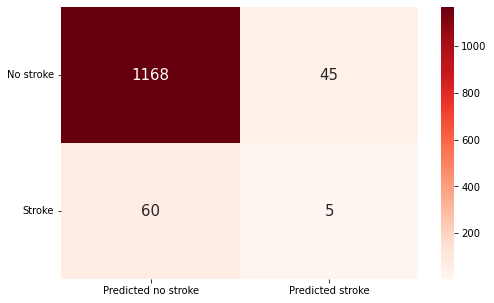

In [89]:
plt.figure(figsize = (8, 5))
sns.heatmap(cm_randf, cmap= 'Reds', annot = True, fmt = 'd', annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

In [90]:
y_probs=randf.predict_proba(x_test)[:,1]
print('ROC AUC score:', roc_auc_score(y_test, y_probs))
print('Accuracy Score: ',accuracy_score(y_test, y_pred_randf))

ROC AUC score: 0.7172870822499842
Accuracy Score:  0.9178403755868545


In [91]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)

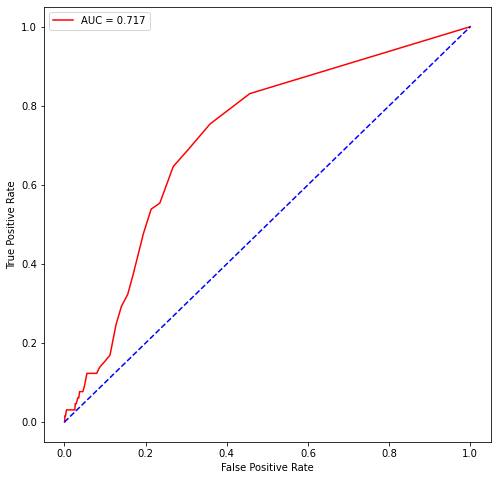

In [92]:
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = 'red', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = 'blue')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

CLUSTERING

In [93]:
X.shape

(5109, 15)

Text(0, 0.5, 'Cumulative Explained Variance')

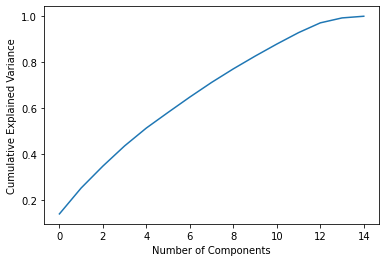

In [94]:
#PCA
from sklearn.decomposition import PCA
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [97]:
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(X)

In [98]:
print(pca.explained_variance_ratio_)
print('Sum of explained variance ratio:', sum(pca.explained_variance_ratio_))

[0.13878117 0.11294491 0.09544526 0.08804988 0.07785407 0.06811674
 0.06678892]
Sum of explained variance ratio: 0.6479809606551515


In [99]:
X = pd.DataFrame(data= principalComponents)
X.head(10)

,0,1,2,3,4,5,6
0,4.138525,-1.927473,-0.437913,-1.687231,-0.227388,-0.149965,1.727842
1,0.869166,0.392535,0.763315,2.320706,0.142373,-0.589172,-0.464062
2,2.358094,-1.080133,1.726696,-0.721520,1.123388,-1.802579,0.747535
3,1.226371,1.658923,-1.985594,0.790466,1.620968,1.103445,-0.582734
4,2.037467,-1.415078,2.517050,0.184655,0.789651,-0.271623,-0.932780
5,2.158777,-1.298178,-0.661542,-1.101836,-1.390203,0.401426,0.966658
6,3.009763,-1.481831,2.106869,-0.643346,1.590669,-1.705456,0.416955
7,-0.555601,-0.896078,1.804384,-0.138842,0.186668,0.889757,-0.811393
8,0.085559,1.030907,-0.801234,1.383203,-0.509209,-0.567079,-0.923608
9,0.196505,-0.621366,0.361806,-0.793177,-0.243004,1.246513,-1.204816


KMeans Clustering

In [100]:
from sklearn.cluster import KMeans

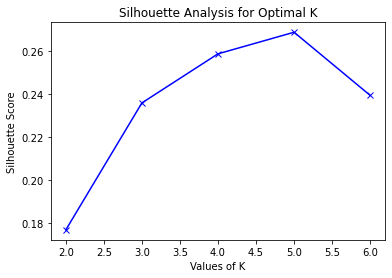

In [101]:
#Determination of optimal cluster number
from sklearn import metrics
range_n_clusters = [2, 3, 4, 5, 6]
silhouette_avg = []
for num_clusters in range_n_clusters:
     
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(metrics.silhouette_score(X, cluster_labels))   
plt.plot(range_n_clusters,silhouette_avg, 'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette Score') 
plt.title('Silhouette Analysis for Optimal K')
plt.show()

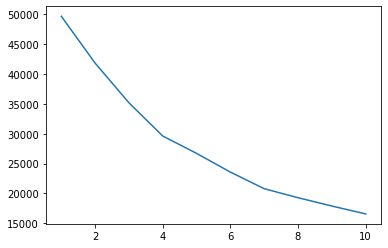

In [102]:
sonuclar=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X)
    sonuclar.append(kmeans.inertia_)
plt.plot(range(1,11),sonuclar)
plt.show()

In [103]:
kmeans=KMeans(n_clusters=5, init= 'k-means++', random_state=0)
predict=kmeans.fit_predict(X)

In [104]:
print(kmeans.cluster_centers_)

[[-6.16112821e-01  1.26990450e+00  2.27245399e-01 -1.01883582e+00
  -1.46607943e-01  1.85393600e-02  3.10984002e-01]
 [ 7.61722792e-01  7.22975934e-01 -8.30429925e-01  1.53552272e+00
  -7.22336247e-02 -6.86440092e-03 -1.50302626e-01]
 [-1.56606234e+00 -1.07622340e+00 -7.59533668e-02  2.26431160e-01
   1.41816076e-01 -2.56588780e-01 -1.41902031e-01]
 [-2.97041886e+00 -2.67006597e+00  1.73090807e+00  2.67448986e+00
   1.56270578e+00  5.58937425e+00  1.02520068e+01]
 [ 1.56420127e+00 -1.07989728e+00  6.30590520e-01 -6.65132538e-01
   7.28060694e-02  1.42392941e-01 -2.49653894e-01]]


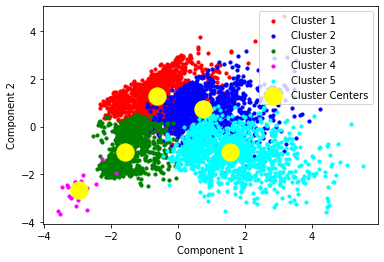

In [105]:
X=np.array(X)
plt.scatter(X[predict == 0, 0], X[predict == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[predict == 1, 0], X[predict == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[predict == 2, 0], X[predict == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(X[predict == 3, 0], X[predict == 3, 1], s = 10, c = 'magenta', label = 'Cluster 4')
plt.scatter(X[predict == 4, 0], X[predict == 4, 1], s = 10, c = 'cyan', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Cluster Centers')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

In [106]:
from sklearn import metrics
print("Silhouette Coefficient: %0.6f"
      % metrics.silhouette_score(X, kmeans.labels_ ))
print("Davies Bouldin Index: %0.6f"
      % metrics.davies_bouldin_score(X, kmeans.labels_ ))
print("Calinski Harabasz Index: %0.6f"
      % metrics.calinski_harabasz_score(X, kmeans.labels_))

Silhouette Coefficient: 0.258251
Davies Bouldin Index: 1.189035
Calinski Harabasz Index: 1141.906483


AgglomerativeClustering

In [107]:
from sklearn.cluster import AgglomerativeClustering
ac=AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="ward")
predict=ac.fit_predict(X)

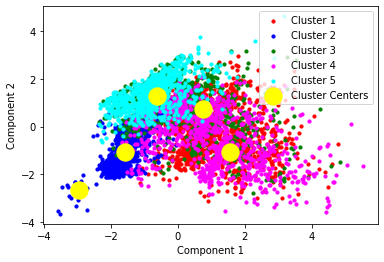

In [108]:
X=np.array(X)
plt.scatter(X[predict == 0, 0], X[predict == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[predict == 1, 0], X[predict == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[predict == 2, 0], X[predict == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(X[predict == 3, 0], X[predict == 3, 1], s = 10, c = 'magenta', label = 'Cluster 4')
plt.scatter(X[predict == 4, 0], X[predict == 4, 1], s = 10, c = 'cyan', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Cluster Centers')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

REGRESSİON

In [109]:
df.head()

,gender,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,age_Adult,age_Middle-aged Adult,age_Old Adult,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0,1,1,1,228.69,36.600000,1,0,0,1,0,1,0,0,1,0,0
1,0,0,0,1,0,202.21,28.893237,1,0,1,0,0,0,1,0,0,1,0
2,1,0,1,1,0,105.92,32.500000,1,0,0,1,0,1,0,0,0,1,0
3,0,0,0,1,1,171.23,34.400000,1,0,1,0,0,1,0,0,0,0,1
4,0,1,0,1,0,174.12,24.000000,1,0,0,1,0,0,1,0,0,1,0


In [110]:
df2=df.copy()

In [111]:
df=sc.fit_transform(df)

In [112]:
df=pd.DataFrame(data=df, columns=df2.columns)

In [113]:
df.head()

,gender,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,age_Adult,age_Middle-aged Adult,age_Old Adult,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.189791,-0.328637,4.184599,0.723678,0.983884,2.706450,1.001041,4.417926,-0.59144,-0.573357,1.777758,-0.065763,0.864444,-0.436931,-0.394157,2.186187,-0.766893,-0.427363
1,-0.840484,-0.328637,-0.238972,0.723678,-1.016380,2.121652,-0.000165,4.417926,-0.59144,1.744113,-0.562506,-0.065763,-1.156812,2.288689,-0.394157,-0.457417,1.303962,-0.427363
2,1.189791,-0.328637,4.184599,0.723678,-1.016380,-0.004867,0.468399,4.417926,-0.59144,-0.573357,1.777758,-0.065763,0.864444,-0.436931,-0.394157,-0.457417,1.303962,-0.427363
3,-0.840484,-0.328637,-0.238972,0.723678,0.983884,1.437473,0.715233,4.417926,-0.59144,1.744113,-0.562506,-0.065763,0.864444,-0.436931,-0.394157,-0.457417,-0.766893,2.339933
4,-0.840484,3.042866,-0.238972,0.723678,-1.016380,1.501297,-0.635858,4.417926,-0.59144,-0.573357,1.777758,-0.065763,-1.156812,2.288689,-0.394157,-0.457417,1.303962,-0.427363


In [114]:
#Target-bmi
X=df.drop(df[['bmi']], axis=1)
Y=df['bmi']

In [115]:
#Backward Elimination
model = st.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    bmi   R-squared (uncentered):                   0.246
Model:                            OLS   Adj. R-squared (uncentered):              0.243
Method:                 Least Squares   F-statistic:                              97.55
Date:                Fri, 11 Nov 2022   Prob (F-statistic):                   1.31e-295
Time:                        19:50:59   Log-Likelihood:                         -6529.2
No. Observations:                5109   AIC:                                  1.309e+04
Df Residuals:                    5092   BIC:                                  1.320e+04
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
gender                             0.0047      0.012      0.379      0.704      -0.020       0.029
hypertension                       0.0900      0.013      7.018      0.000       0.065       0.115
heart_disease                     -0.0150      0.013     -1.162      0.245      -0.040       0.010
ever_married                       0.0543      0.019      2.916      0.004       0.018       0.091
Residence_type                    -0.0004      0.012     -0.035      0.972      -0.024       0.023
avg_glucose_level                  0.1131      0.013      8.869      0.000       0.088       0.138
stroke                            -0.0128      0.013     -1.014      0.311      -0.038       0.012
age_Adult                          0.1495      0.022      6.815      0.000       0.106       0.192
age_Middle-aged Adult              0.1539      0.024      6.487      0.000       0.107       0.200
age_Old Adult                      0.0413      0.025      1.673      0.094      -0.007       0.090
work_type_Never_worked            -0.0137      0.013     -1.088      0.277      -0.038       0.011
work_type_Private                  0.0127      0.019      0.677      0.499      -0.024       0.049
work_type_Self-employed           -0.0071      0.017     -0.417      0.677      -0.040       0.026
work_type_children                -0.2972      0.022    -13.709      0.000      -0.340      -0.255
smoking_status_formerly smoked     0.0351      0.015      2.279      0.023       0.005       0.065
smoking_status_never smoked        0.0215      0.016      1.314      0.189      -0.011       0.053
smoking_status_smokes              0.0126      0.015      0.833      0.405      -0.017       0.042
==============================================================================
Omnibus:                     1682.231   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9170.744
Skew:                           1.474   Prob(JB):                         0.00
Kurtosis:                       8.865   Cond. No.                         5.18
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
x_l=X.iloc[:,[1,3,5,7,8,13,14]]
model2=st.OLS(Y,x_l).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    bmi   R-squared (uncentered):                   0.244
Model:                            OLS   Adj. R-squared (uncentered):              0.243
Method:                 Least Squares   F-statistic:                              235.6
Date:                Fri, 11 Nov 2022   Prob (F-statistic):                   1.31e-304
Time:                        19:51:47   Log-Likelihood:                         -6533.8
No. Observations:                5109   AIC:                                  1.308e+04
Df Residuals:                    5102   BIC:                                  1.313e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
hypertension                       0.0924      0.013      7.328      0.000       0.068       0.117
ever_married                       0.0698      0.015      4.563      0.000       0.040       0.100
avg_glucose_level                  0.1136      0.013      9.035      0.000       0.089       0.138
age_Adult                          0.1294      0.014      9.166      0.000       0.102       0.157
age_Middle-aged Adult              0.1274      0.014      8.945      0.000       0.099       0.155
work_type_children                -0.3183      0.015    -20.964      0.000      -0.348      -0.289
smoking_status_formerly smoked     0.0253      0.012      2.033      0.042       0.001       0.050
==============================================================================
Omnibus:                     1670.559   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8987.303
Skew:                           1.467   Prob(JB):                         0.00
Kurtosis:                       8.798   Cond. No.                         2.11
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
x_train, x_test, y_train, y_test=train_test_split(x_l,Y,test_size=0.33,random_state=0)

Linear Regression

In [118]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)

In [119]:
print(mean_absolute_error(y_test, y_pred_lr))
print(mean_squared_error(y_test, y_pred_lr))
print(r2_score(y_test, y_pred_lr))

0.6351457011682663
0.7422384378727329
0.26111562181232706


SVR

In [123]:
sr=SVR(kernel='rbf')
sr.fit(x_train, y_train)
y_pred_sr=sr.predict(x_test)

In [124]:
print(mean_absolute_error(y_test, y_pred_sr))
print(mean_squared_error(y_test, y_pred_sr))
print(r2_score(y_test, y_pred_sr))

0.6334015697767038
0.7779624154726433
0.2255530752929752


Decision Tree Regression

In [125]:
dr=DecisionTreeRegressor(random_state=0)
dr.fit(x_train, y_train)
y_pred_dr=dr.predict(x_test)

In [126]:
print(mean_absolute_error(y_test, y_pred_dr))
print(mean_squared_error(y_test, y_pred_dr))
print(r2_score(y_test, y_pred_dr))

0.9329669231316411
1.5525938779767394
-0.5455779485022199
